In [4]:
import uproot
import csv

def flatten_nested_list(nested_list):
    flattened_list = []
    for sublist in nested_list:
        flattened_list.extend(sublist)
    return flattened_list

def copy_leaf_to_csv():
    # Provide the necessary information
    root_file_path = "Events/run_01/tag_1_delphes_events.root"
    tree_name = "Delphes"
    branch_name = "Jet"
    leaf_name = "Jet.PT"
    csv_output_path = "output.csv"

    # Open the ROOT file and get the TTree
    with uproot.open(root_file_path) as file:
        tree = file[tree_name]

        # Get the data from the leaf as an awkward array
        awkward_array = tree[branch_name][leaf_name].array()

        # Flatten the nested structure if present
        flat_list = flatten_nested_list(awkward_array.tolist())

        # Write the flattened list to a CSV file without brackets
        with open(csv_output_path, 'w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow([leaf_name])  # Write header
            csv_writer.writerows(map(lambda x: [x], flat_list))  # Map each element to a list

if __name__ == "__main__":
    # Call the function to copy data to CSV
    copy_leaf_to_csv()

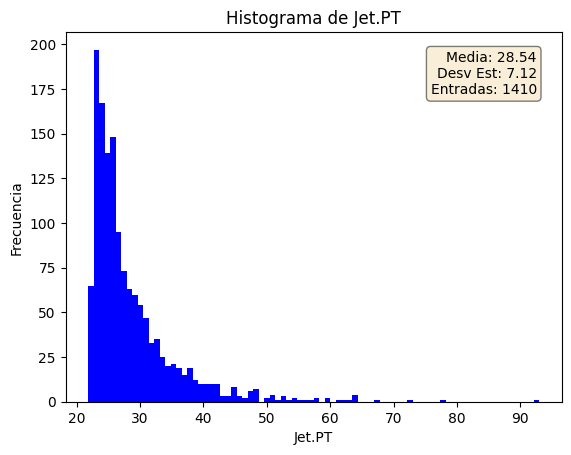

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('output.csv')

# Seleccionar la columna de interés
columna_de_interes = 'Jet.PT'
data = df[columna_de_interes]

# Calcular estadísticas
media = data.mean()
std_dev = data.std()
num_entradas = len(data)

# Crear el histograma
plt.hist(data, bins=82, color='blue')

# Personalizar el gráfico
plt.title('Histograma de {}'.format(columna_de_interes))
plt.xlabel(columna_de_interes)
plt.ylabel('Frecuencia')

# Agregar texto con información estadística en la esquina superior derecha
info_text = f'Media: {media:.2f}\nDesv Est: {std_dev:.2f}\nEntradas: {num_entradas}'
plt.text(0.95, 0.95, info_text, transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Mostrar el gráfico
plt.show()